In [89]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


# Load the Facebook Dataset from Yahoo Finance

In [90]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol for Facebook (Meta Platforms, Inc.)
ticker = "META"

# Download the historical stock price data
# You can specify the date range using the start and end parameters
fb = yf.download(ticker, start="2020-01-01", end="2023-12-31")

# Display the first few rows of the data
fb.head()

# Save the data to a CSV file if needed
fb.to_csv("facebook_stock_prices.csv")


[*********************100%***********************]  1 of 1 completed


In [91]:
fb.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000


In [92]:
# Flatten the multi-level columns
fb.columns = fb.columns.get_level_values(0)  # Use only the first level (Price, Close, etc.)


### Create a new column PriceDiff in the data frame fb 

In [93]:
fb['price_diff']=fb['Close'].shift(-1)-fb['Close']
fb.head()

Price,Adj Close,Close,High,Low,Open,Volume,price_diff
Date,,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100,-1.110001
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400,3.930008
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900,0.459991
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400,2.160004
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000,3.080002


### Display the price difference of facebook on 2020-02-06 i.e 6th of Feb 2020

In [94]:
fb['price_diff'].loc['2020-02-06']

1.4799957275390625

### create a new column daily returns in the data frame 'fb' where daily return is calculated using the following formula
### Daily Return= price difference/closing price

In [95]:
print(type(fb['price_diff']))
print(type(fb['Close']))



<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [96]:
fb['daily_return']=fb['price_diff']/fb['Close']
fb.head()

Price,Adj Close,Close,High,Low,Open,Volume,price_diff,daily_return
Date,,,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100,-1.110001,-0.005291
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400,3.930008,0.018834
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900,0.459991,0.002164
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400,2.160004,0.010138
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000,3.080002,0.014311


### Create a new column called 'Trend' using list comprehension method i.e if the price differennce is greater than 0 denote 1 (uptrend) else denote 0 (downtrend) for every index record of the data frame

In [97]:
fb['Trend'] = [1 if fb['price_diff'].loc[i] > 0 else 0 for i in fb.index]
fb.head()


Price,Adj Close,Close,High,Low,Open,Volume,price_diff,daily_return,Trend
Date,,,,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100,-1.110001,-0.005291,0
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400,3.930008,0.018834,1
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900,0.459991,0.002164,1
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400,2.160004,0.010138,1
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000,3.080002,0.014311,1


### .rolling() function is used to calculate the moving average

In [101]:
fb['ma50']=fb['Close'].rolling(50).mean()
fb['ma50']

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2023-12-22    325.3110
2023-12-26    326.1138
2023-12-27    326.8474
2023-12-28    327.5338
2023-12-29    328.2736
Name: ma50, Length: 1006, dtype: float64

In [102]:
fb['ma50'].isnull().sum()

49

In [105]:
fb['ma50']=fb['ma50'].fillna(method='ffill')

/var/folders/q5/4fzp484s7_521gjnj1hlzpnr0000gn/T/ipykernel_82003/2393982031.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fb['ma50']=fb['ma50'].fillna(method='ffill')


In [107]:
fb['ma10']=fb['Close'].rolling(10).mean()
fb.ma10

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2023-12-22    341.407001
2023-12-26    344.362000
2023-12-27    346.722998
2023-12-28    349.081000
2023-12-29    351.159998
Name: ma10, Length: 1006, dtype: float64

### Plotting the moving average

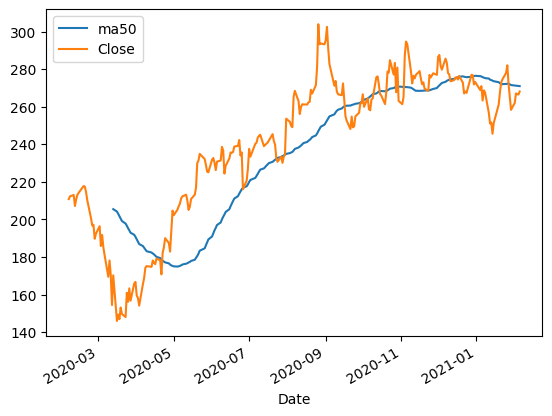

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
fb['ma50'].loc['2020-02-06':'2021-02-06'].plot(label='ma50')
fb['Close'].loc['2020-02-06':'2021-02-06'].plot(label='Close')
plt.legend()
plt.show()

### Add a new column "Strategy", if ma10>ma50 denote as 1 ( we will long/buy a share) else denote as 0 (we will do nothing)

In [109]:
fb['Strategy']=[1 if fb.loc[i,'ma10']>fb.loc[i,'ma50'] else 0 for i in fb.index]
fb.head()

Price,Adj Close,Close,High,Low,Open,Volume,price_diff,daily_return,Trend,ma50,ma10,Strategy
Date,,,,,,,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100,-1.110001,-0.005291,0,NaN,NaN,0
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400,3.930008,0.018834,1,NaN,NaN,0
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900,0.459991,0.002164,1,NaN,NaN,0
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400,2.160004,0.010138,1,NaN,NaN,0
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000,3.080002,0.014311,1,NaN,NaN,0


### Add a new column called "Profit" using list comprehension for any rows in fb data frame, if Strategy==1 

### the profit is calculated as close price of tomorrow - close price of today, else profit will be marked as 0

In [112]:
fb['Close_tomorrow'] = fb['Close'].shift(-1)

# Use a list comprehension with element-wise evaluation
fb['Profit'] = [
    fb.loc[i, 'Close_tomorrow'] - fb.loc[i, 'Close'] if fb.loc[i, 'Strategy'] == 1 else 0
    for i in fb.index
]

fb.head()


Price,Adj Close,Close,High,Low,Open,Volume,price_diff,daily_return,Trend,ma50,ma10,Strategy,Close_tomorrow,Profit
Date,,,,,,,,,,,,,,
2020-01-02,208.981689,209.779999,209.789993,206.270004,206.750000,12077100,-1.110001,-0.005291,0,NaN,NaN,0,208.669998,0.0
2020-01-03,207.875931,208.669998,210.399994,206.949997,207.210007,11188400,3.930008,0.018834,1,NaN,NaN,0,212.600006,0.0
2020-01-06,211.790970,212.600006,212.779999,206.520004,206.699997,17058900,0.459991,0.002164,1,NaN,NaN,0,213.059998,0.0
2020-01-07,212.249207,213.059998,214.580002,211.750000,212.820007,14912400,2.160004,0.010138,1,NaN,NaN,0,215.220001,0.0
2020-01-08,214.401001,215.220001,216.240005,212.610001,213.000000,13475000,3.080002,0.014311,1,NaN,NaN,0,218.300003,0.0


### Cummulative Sum: Use .cumsum() function to calculate the accumulated wealth over the period

In [114]:
fb['accumulated_wealth']= fb['Profit'].cumsum()
fb['accumulated_wealth']

Date
2020-01-02      0.000000
2020-01-03      0.000000
2020-01-06      0.000000
2020-01-07      0.000000
2020-01-08      0.000000
                 ...    
2023-12-22    216.059975
2023-12-26    219.059975
2023-12-27    219.549995
2023-12-28    215.189980
2023-12-29           NaN
Name: accumulated_wealth, Length: 1006, dtype: float64

# Models for stock return using statistical analysis

### Calculate the log return of the Facebook Stocks

In [118]:
fb['Log_return'] = np.log(fb['Close'].shift(-1)) - np.log(fb['Close'])
fb['Log_return']

Date
2020-01-02   -0.005305
2020-01-03    0.018658
2020-01-06    0.002161
2020-01-07    0.010087
2020-01-08    0.014210
                ...   
2023-12-22    0.004066
2023-12-26    0.008419
2023-12-27    0.001368
2023-12-28   -0.012243
2023-12-29         NaN
Name: Log_return, Length: 1006, dtype: float64

 ### Plot a histogram to show the distribution of the log return of Facebook stock. You can see that its very close to the normal distribution bcz of the magic of Central Limit Theorem

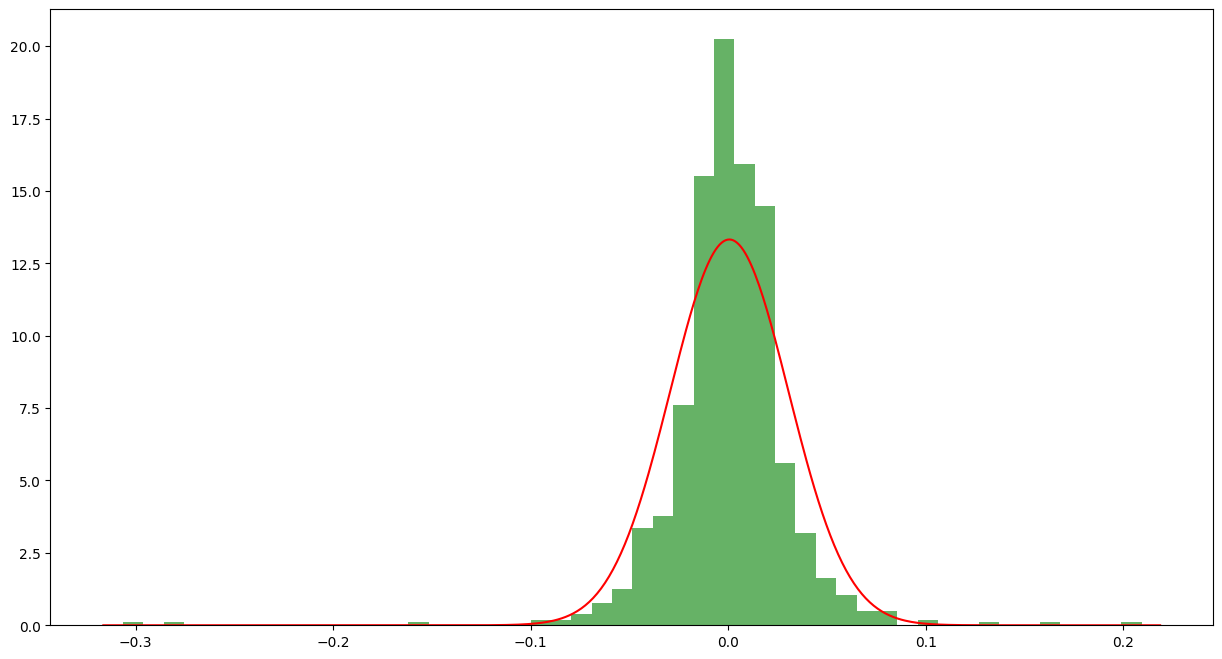

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Create histogram of 'Log_return'
plt.figure(figsize=(15, 8))
plt.hist(fb['Log_return'].dropna(), bins=50, density=True, alpha=0.6, color='g')

# Generate the normal distribution curve
mu, sigma = fb['Log_return'].mean(), fb['Log_return'].std()
density = pd.DataFrame()
density['X'] = np.arange(fb['Log_return'].min() - 0.01, fb['Log_return'].max() + 0.01, 0.001)
density['PDF'] = norm.pdf(density['X'], mu, sigma)

# Plot the normal distribution
plt.plot(density['X'], density['PDF'], color='red')

# Show the plot
plt.show()


### Q) What is the probability that the stock price of Facebook will drop over 5% in a single day

In [123]:
drop_5= norm.cdf(-0.05,mu,sigma)
print(f"the probability that the stock price of FB would drop by 5% in a day is:{drop_5}")

the probability that the stock price of FB would drop by 5% in a day is:0.04578597048100883


### Q) what is the probability that the stock price of Facebook will drop over 40% in 220 trading days

In [124]:
mu220=220*mu
sigma220=220*sigma
drop40= norm.cdf(-0.40,mu,sigma)
print(f"the probability that the stock price of FB would drop by 40% in a day is: {drop40}")

the probability that the stock price of FB would drop by 40% in a day is: 4.197253837983329e-41


### Calculating the Value at Risk (VaR): it estimates the potential loss of a protfolio over a defined period at a given confidence level.

In [125]:
VaR= norm.ppf(0.05,mu,sigma)
print(f"Single day VaR at 95% confidence interval is: {VaR}")

Single day VaR at 95% confidence interval is: -0.04873307423891674


# Hypothesis Testing

### we can see that the log retutn of our portfolio i.e the Facebook Stock goes up and down upon plotting

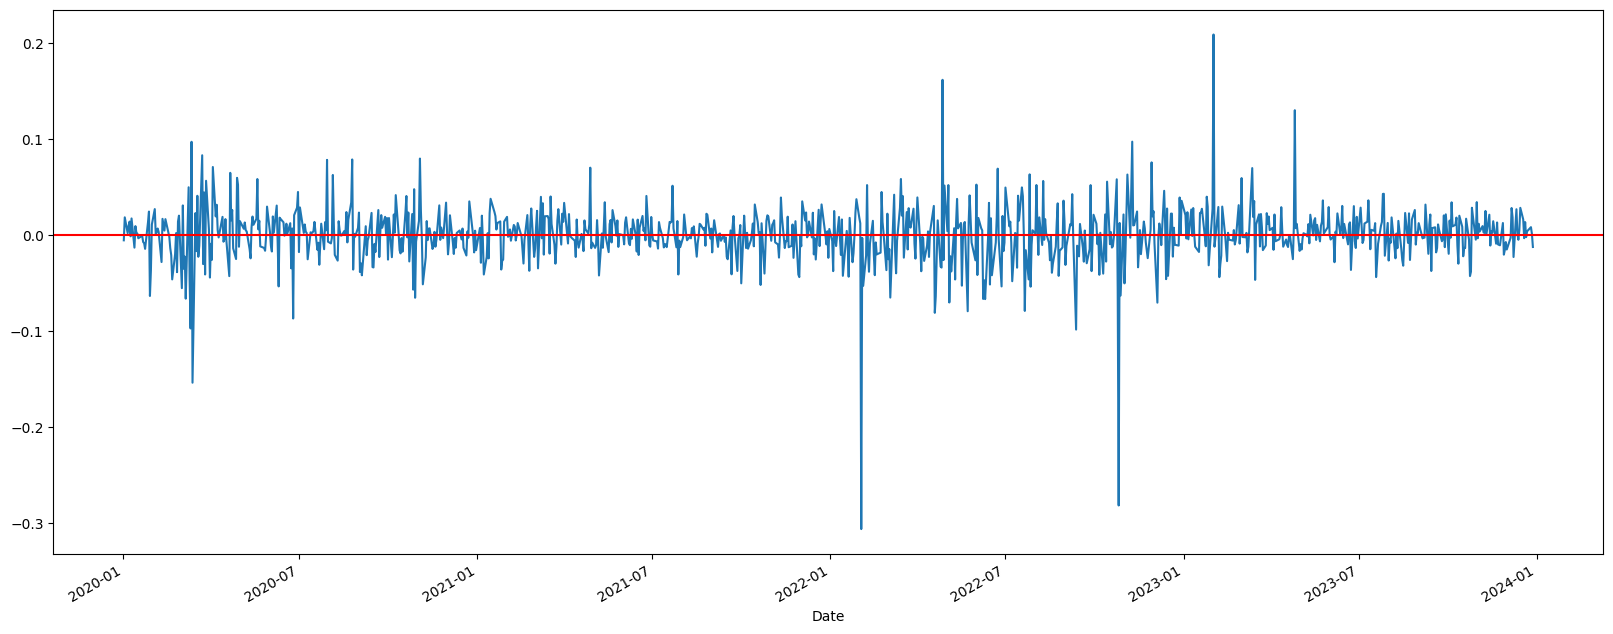

In [126]:
fb['Log_return'].plot(figsize=(20,8))
plt.axhline(0,color='red')
plt.show()

### Set Hypotheis: 
### H0 (Null HYpothesis)- the avg. stock return is 0
### H1 (Alternative Hypothesis)- the avg. stock return is not equal to 0


### Calulate the Z-Test Statistic as the sample size is greater than 30

In [138]:
n= fb['Log_return'].shape[0]
n

1006

In [128]:
sample_mean= fb['Log_return'].mean()
sample_std= fb['Log_return'].std(ddof=1)
n= fb['Log_return'].shape[0]
Z_Test= (sample_mean-0)/(sample_std/n**0.5)
Z_Test

0.5513499336155414

#### i) norm.ppf(alpha/2, 0, 1) computes the Z-score for the left-tail critical value, where alpha/2 is the probability for one tail in a two-tailed test.
#### ii) alpha/2 = 0.025 means that 2.5% of the data lies in the left tail.
#### iii) Z_Left will give you the Z-score corresponding to this 2.5% left-tail probability (typically a negative value).
#### iv) Z_Right = -Z_Left sets the Z-score for the right-tail, and it's the positive equivalent of Z_Left (typically a positive value).


#### Set a decision criteria or critical value or confidence interval 

In [131]:
alpha= 0.05
Z_Left= norm.ppf(alpha/2,0,1)
Z_Right= -Z_Left
print(Z_Left,Z_Right)


-1.9599639845400545 1.9599639845400545


In [132]:
print(f"since {Z_Test} lies between {Z_Left} and {Z_Right} it falls within the acceptance region of the distribution hence under this circumstances we fail to reject the null hypothesis" )

since 0.5513499336155414 lies between -1.9599639845400545 and 1.9599639845400545 it falls within the acceptance region of the distribution hence under this circumstances we fail to reject the null hypothesis


# Hypothesis Testing using p-Value method

In [133]:
p= 1-norm.cdf(Z_Test,0,1)
p

0.2906969073104857

In [136]:
print(f"since the p value ie {p} is greater than the confidence level i.e {alpha} we fail to reject the null hypothesis")

since the p value ie 0.2906969073104857 is greater than the confidence level i.e 0.05 we fail to reject the null hypothesis
